In [330]:
# Source shape file for circo 
# https://www.data.gouv.fr/fr/datasets/contours-geographiques-des-circonscriptions-legislatives/
# Source of legislatives results
# https://www.data.gouv.fr/fr/datasets/resultats-du-1er-tour-des-elections-legislatives-2024-par-circonscription/

In [331]:
# Load packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os


# Path to the uploaded CSV file
file_path = './lg2024-resultats-circonscriptions-une-ligne-par-candidat2.csv'

In [332]:
# Load the CSV file into a DataFrame with the 'latin1' encoding
df_raw = pd.read_csv(file_path, encoding='latin1')
df_raw.head()

,Departement,CodCirElec,LibCirElec,NbSap,NbSiePourvus,Inscrits,Abstentions,Votants,Blancs,Nuls,...,NumPanneauCand,NomPsn,PrenomPsn,CivilitePsn,CodNuaCand,LibNuaCand,NbVoix,RapportExprimes,RapportInscrits,Elu
0,01,0101,1re circonscription,1,0,86843,25013,61830,929,406,...,1,LAHY,ric,M.,EXG,Extrme gauche,419,"0,69","0,48",NON
1,01,0101,1re circonscription,1,0,86843,25013,61830,929,406,...,2,MA×TRE,Christophe,M.,RN,Rassemblement National,23819,"39,37","27,43",QUALIF T2
2,01,0101,1re circonscription,1,0,86843,25013,61830,929,406,...,3,BRETON,Xavier,M.,LR,Les Rpublicains,14495,"23,96","16,69",QUALIF T2
3,01,0101,1re circonscription,1,0,86843,25013,61830,929,406,...,4,GUERAUD,Sbastien,M.,UG,Union de la gauche,14188,"23,45","16,34",QUALIF T2
4,01,0101,1re circonscription,1,0,86843,25013,61830,929,406,...,5,VINCENT,Cyril,M.,DSV,Droite souverainiste,197,"0,33","0,23",NON


In [333]:
# Exclusion of circonscriptions without second round
# List CodCirElec in dataframe where Elu = Oui
cod_cir_no_second_turn = list(df_raw[df_raw['Elu'] == 'OUI']['CodCirElec'].unique())
len(cod_cir_no_second_turn)
# Exclude in df 'CodCirElec' values that not in the list above
# No second round in these constituencies
df = df_raw[~df_raw['CodCirElec'].isin(cod_cir_no_second_turn)]


In [334]:
df['CodNuaCand'].unique()

array(['EXG', 'RN', 'LR', 'UG', 'DSV', 'ENS', 'EXD', 'DIV', 'ECO', 'DVD',
       'REC', 'UXD', 'UDI', 'REG', 'DVG', 'DVC', 'HOR', 'COM', 'SOC',
       'FI', 'VEC', 'RDG'], dtype=object)

In [335]:
# For each CodNuaCand print first five lines with columns 'Departement', 'CodCirElec', 'LibCirElec' 'NomPsn', 'PrenomPsn', 'CivilitePsn'
# for cod in df['CodNuaCand'].unique():
#     print(f"Five first results of {cod}")
#     print(df[df['CodNuaCand'] == cod][['Departement', 'CodCirElec', 'LibCirElec', 'NomPsn', 'PrenomPsn']].head())
    

In [336]:
correspondance_code_nuance = {
    'EXG': 'Extrême gauche', # Lutte ouvrière
    'RN': 'Rassemblement National',
    'LR': 'Les Républicains', 
    'UG': 'Union de la Gauche', # Le nouveau front populaire
    'DSV': 'Divers', # Candidature libre et indépendante
    'ENS': 'Ensemble', # Modem - Ensemble
    'EXD': ' Reconquête', # Reconquête (Zemmour) Extreme droite
    'DIV': 'Divers', # Divers Candidature libre et indépendante
    'ECO': 'Divers écologistes',
    'DVD': 'Divers droite',
    'REC': 'Reconquête', # Reconquête (Zemmour) 2
    'UXD': 'RN + Républicain', # RN + Les Républicains
    'DVG': 'Divers gauche',
    'UDI': 'Droite ecolo',
    'REG': 'Vote nul candidat avec 0%',
    'DVC': 'Vote minoritaire pas RN',
    'HOR': 'Horizon -ensemble',
    'COM': 'Autres pas RN',
    'VEC': 'Autres gauches',
    'FI': 'Associé front populaire',
    'SOC': 'DOM TOM',
    'RDG': 'Autres gauches'
}    

In [337]:
# 2 statuses: 'RN' or 'NotRN'
# List RN's nuance codes
rn_codes = ['RN', 'EXD', 'REC', 'UXD']
# Create a new column 'Status' with the value 'RN' if the value of 'CodNuaCand' is in 'rn_codes' and 'NotRN' otherwise
df['Status'] = df['CodNuaCand'].apply(lambda x: 'RN' if x in rn_codes else 'NotRN')
# List CodCirElec in dataframe where Elu = "QUALIF T2" & Status = 'RN'
list_circo_RN = df[(df['Elu'] == 'QUALIF T2') & (df['Status'] == 'RN')]['CodCirElec'].unique()
print(f"{len(list_circo_RN)} constituencies with RN in 2nd turn")
# Create a new df only with rows which CodCirElec is in list_circo_RN
# We exclude 2nd turn when RN is not present
df = df[df['CodCirElec'].isin(list_circo_RN)]

445 constituencies with RN in 2nd turn


/var/folders/t3/myv5sjjd0537bvgr90_h_fcc0000gn/T/ipykernel_21795/1757765522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = df['CodNuaCand'].apply(lambda x: 'RN' if x in rn_codes else 'NotRN')


In [338]:
# For each CodCirElec sum raw votes for RN and non-RN candidates and create a new dataframe with columns 'CodCirElec', 'Status', 'NbVoix'
df_status_sum = df.groupby(['CodCirElec', 'Status'])['NbVoix'].sum().reset_index()
df_status_sum.shape


(890, 3)

In [339]:
# Create a pivot table to organize the data by CodCirElec and Status
pivot_df = df_status_sum.pivot(index='CodCirElec', columns='Status', values='NbVoix')

# Calculate the difference between NotRN and RN (positive when NotRN > RN)
pivot_df['VoteDiff'] = pivot_df['NotRN'] - pivot_df['RN']

# Reset the index to turn CodCirElec back into a column
result_df = pivot_df.reset_index()

# Order the result by the difference between NotRN and RN in ascending order
result_df = result_df.sort_values('VoteDiff', ascending=True)
result_df.head(15)

Status,CodCirElec,NotRN,RN,VoteDiff
389,8404,28199,32317,-4118
176,4102,24182,27330,-3148
45,1315,36862,38907,-2045
142,3405,32939,34127,-1188
28,1101,32985,33739,-754
198,4504,23019,23766,-747
41,1310,38446,38703,-257
94,2703,28606,28702,-96
319,7001,30177,30159,18
29,1102,30521,30181,340


In [340]:
# Create dataframe with decoupage circo shapefile
# Load the shapefile
shapefile_path = './decoupage_circo/circonscriptions-legislatives.shp'
gdf = gpd.read_file(shapefile_path)
df_map = gdf.merge(result_df, left_on='codeCircon', right_on='CodCirElec')
# Drop useless columns
df_map = df_map.drop(columns=['nomCircons', 'CodCirElec'])
df_map.head()

,codeDepart,nomDeparte,codeCircon,geometry,NotRN,RN,VoteDiff
0,01,Ain,0104,"POLYGON ((4.92752 45.98002, 4.91945 45.98256, ...",35467,30221,5246
1,01,Ain,0105,"POLYGON ((5.59064 45.76002, 5.59062 45.75858, ...",30942,20590,10352
2,01,Ain,0103,"POLYGON ((5.58641 45.66711, 5.58886 45.66773, ...",36468,17252,19216
3,01,Ain,0102,"POLYGON ((4.74917 46.00357, 4.75243 46.00381, ...",41866,30052,11814
4,01,Ain,0101,"POLYGON ((5.51135 46.26447, 5.5104 46.26378, 5...",36676,23819,12857


In [341]:
# In order to show only the constituencies where the difference is the smallest,
# I consider only the absolute values in the 'VoteDiff' column.
df_map['VoteDiff'] = df_map['VoteDiff'].abs()

# Add column "Inscrits" from df_raw to df_map with a merge on "codeCircon"
df_inscrits = df_raw[['CodCirElec', 'Inscrits']].copy()
df_inscrits = df_inscrits.drop_duplicates()
df_map = df_map.merge(df_inscrits, left_on='codeCircon', right_on='CodCirElec')
df_map = df_map.drop(columns=['CodCirElec'])

# Add column percentage of VoteDiff compare to Inscrits
df_map['PourcentageDiff'] = df_map['VoteDiff'] / df_map['Inscrits'] * 100

In [342]:
# Data cleaning add circo with NaN values in order to get black edges for every circo
# Create a list of unique codeCircon in df_map
list_code_circon_map = df_map['codeCircon'].unique()
# Create a list of unique code Circon in df_raw
list_code_circon_raw = df_raw['CodCirElec'].unique()
# Create a list of codeCircon that are not in list_code_circon_map
list_code_circon = list(set(list_code_circon_raw) - set(list_code_circon_map))
# Create a new dataframe with the list of codeCircon above
df_nan = gdf[gdf['codeCircon'].isin(list_code_circon)].copy()
df_nan['VoteDiff'] = float('nan')
df_nan['NotRN'] = float('nan')
df_nan['RN'] = float('nan')
df_nan['PourcentageDiff'] = float('nan')
# Drop column nomCircons
df_nan = df_nan.drop(columns=['nomCircons'])
# Reorder df_nan columns with the right order 
df_nan = df_nan[[
      'codeDepart',
      'nomDeparte',
      'codeCircon',
      'geometry',
      'NotRN',
      'RN',
      'VoteDiff',
      'PourcentageDiff']]
# Concatenate df_map and df_nan
df_map = pd.concat([df_map, df_nan])
print(f"Nombre de circonscriptions: {df_map.shape[0]}\n"
      "Exclusions DOM TOM et Français à l'étranger") 

Nombre de circonscriptions: 539
Exclusions DOM TOM et Français à l'étranger


In [343]:
# Vote diff percentage order by descending order in table format
df_map = df_map.sort_values('VoteDiff', ascending=True)
df_map.head(15)

,codeDepart,nomDeparte,codeCircon,geometry,NotRN,RN,VoteDiff,Inscrits,PourcentageDiff
319,70,Haute-SaÃ´ne,7001,"POLYGON ((5.51836 47.30407, 5.51646 47.30436, ...",30177.0,30159.0,18.0,88355.0,0.020372
99,27,Eure,2703,"POLYGON ((0.39978 49.10081, 0.40168 49.10431, ...",28606.0,28702.0,96.0,85635.0,0.112104
36,13,Bouches-du-RhÃ´ne,1310,"POLYGON ((5.46603 43.50519, 5.46553 43.50667, ...",38446.0,38703.0,257.0,110764.0,0.232025
30,11,Aude,1102,"POLYGON ((2.86524 42.91853, 2.86729 42.91864, ...",30521.0,30181.0,340.0,92832.0,0.366253
267,60,Oise,6006,"POLYGON ((3.11832 49.70597, 3.12224 49.70185, ...",24620.0,24259.0,361.0,75856.0,0.475902
13,06,Alpes-Maritimes,0602,"POLYGON ((6.6363 43.78892, 6.63583 43.7904, 6....",30034.0,29607.0,427.0,90381.0,0.472444
377,80,Somme,8004,"POLYGON ((2.12421 49.68786, 2.12226 49.68788, ...",28999.0,28559.0,440.0,85080.0,0.517160
376,80,Somme,8003,"POLYGON ((1.99415 50.2758, 1.99676 50.27444, 1...",28130.0,27647.0,483.0,82023.0,0.588859
384,83,Var,8307,"POLYGON ((5.75731 43.13298, 5.75718 43.13262, ...",34172.0,33635.0,537.0,103766.0,0.517511
403,88,Vosges,8804,"POLYGON ((5.58843 48.27376, 5.58888 48.27559, ...",21688.0,21067.0,621.0,64121.0,0.968481


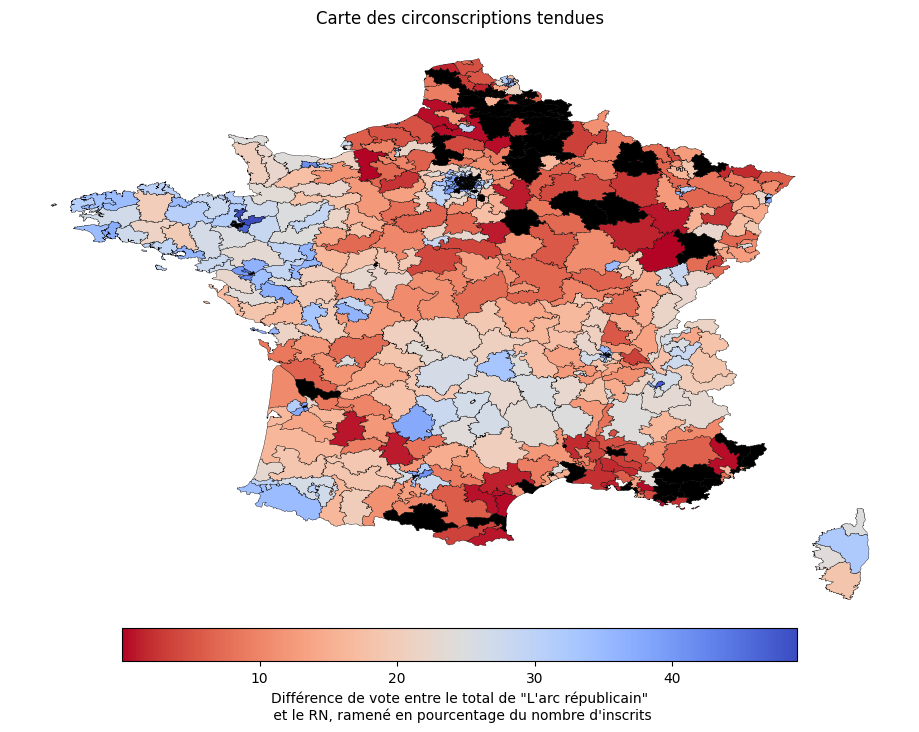

In [344]:
# Create the map based on previous dataframe
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df_map.plot(
    column='PourcentageDiff',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Différence de vote entre le total de \"L\'arc républicain\"\n et le RN, ramené en pourcentage du nombre d\'inscrits',
        'orientation': 'horizontal',
        'shrink': 0.75,
        'pad': 0.001  # Reduce space between color bar and the map
    },
    cmap='coolwarm_r',  # Choose a colormap
    edgecolor='black',  # Black edges
    linewidth=0.25,
    missing_kwds={'color': 'black', 'label': 'Missing values'}
)
ax.axis('off')
# Adjust the layout to reduce the margin
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.15)
plt.title('Carte des circonscriptions tendues', fontsize=12)
plt.show()
# Save the map under the name 'circonscriptions_tendues.png'
fig.savefig('./circonscriptions_tendues.png')
